In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir('C:/Users/Evangelina Garza/Documents/CIMAT/MCE_2Semestre/Ciencia de Datos/PCA')

In [3]:
sns.set()
%matplotlib inline

In [4]:
#Importar las imagenes del conjunto Olivetti
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().data

In [5]:
faces.shape

(400, 4096)

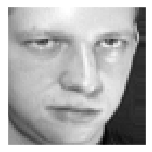

In [9]:
#Grafica de una sola imagen
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
 
ax = fig.add_subplot(5, 5, 1, xticks=[], yticks=[]) 
ax.imshow(np.reshape(faces[9,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.show()

In [7]:
#Vector con los indices que separaremos en entrenamiento vs prueba
xnt=[]
for i in range(40):
    xnt.append((10*i)+9)

In [8]:
# Guardo las imagenes de entrenamiento como png desde arreglos numpy
for i in range(faces.shape[0]):
    if i in xnt:
        continue
    plt.imsave('faces_t/img'+str(i+1)+'.png',
               np.reshape(faces[i,:],(64,64)),cmap='gray')

In [10]:
# Guardo las imagenes de prueba como png desde arreglos numpy
for i in xnt:
    plt.imsave('faces_p/img'+str(i+1)+'.png',
               np.reshape(faces[i,:],(64,64)),cmap='gray')

In [14]:
#Copia de las imagenes de las caras
faces_new=[]
for i in range(400):
    faces_new.append(faces[i,:])

In [15]:
faces_new=np.asarray(faces_new)

In [16]:
faces_new.shape

(400, 4096)

In [17]:
#Separacion de los conjuntos de entrenamiento y prueba
faces_train=[]
faces_test=[]

for i in range(400):
    if i in xnt:
        continue
    faces_train.append(faces[i,:])

for j in xnt:
    faces_test.append(faces[j,:])

In [18]:
faces_test=np.asarray(faces_test)
faces_train=np.asarray(faces_train)

In [19]:
faces_train.shape

(360, 4096)

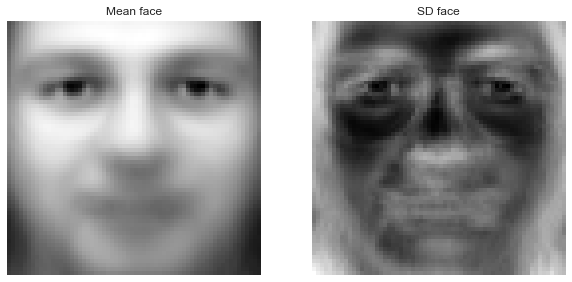

(360, 4096)

In [20]:
#Visualizacion de la media y la desviacion estandar del conjunto de entrenamiento
scaler = StandardScaler(with_mean=True,with_std=True)
faces_scale = scaler.fit_transform(faces_train)
mean_face_t = np.reshape(scaler.mean_, (64,64))
sd_face_t = np.reshape(np.sqrt(scaler.var_), (64,64))

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(mean_face_t, cmap=plt.cm.gray), plt.axis('off'), plt.title('Mean face')
plt.subplot(122), plt.imshow(sd_face_t, cmap=plt.cm.gray), plt.axis('off'), plt.title('SD face')
plt.show()
faces_scale.shape


In [21]:
#Numero de componentes y PCA sobre las caras de prueba
n_comp = 10
faces_pca = PCA(n_comp)
faces_proj = faces_pca.fit_transform(faces_scale)

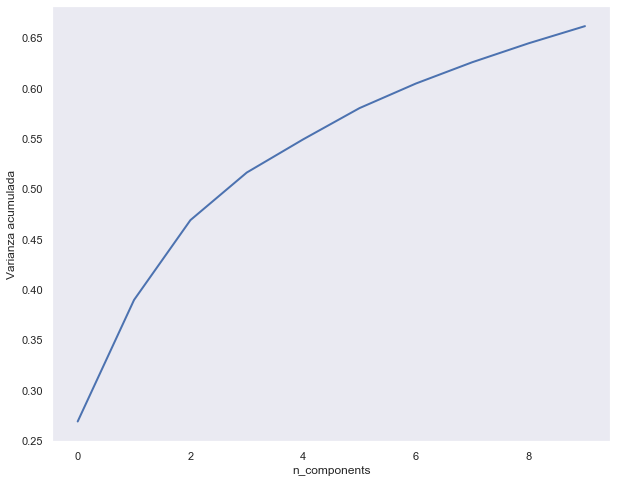

In [22]:
## varianza explicada
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(faces_pca.explained_variance_ratio_), linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('n_components'), plt.ylabel('Varianza acumulada')
plt.show()

In [23]:
faces_pca.components_.shape

(10, 4096)

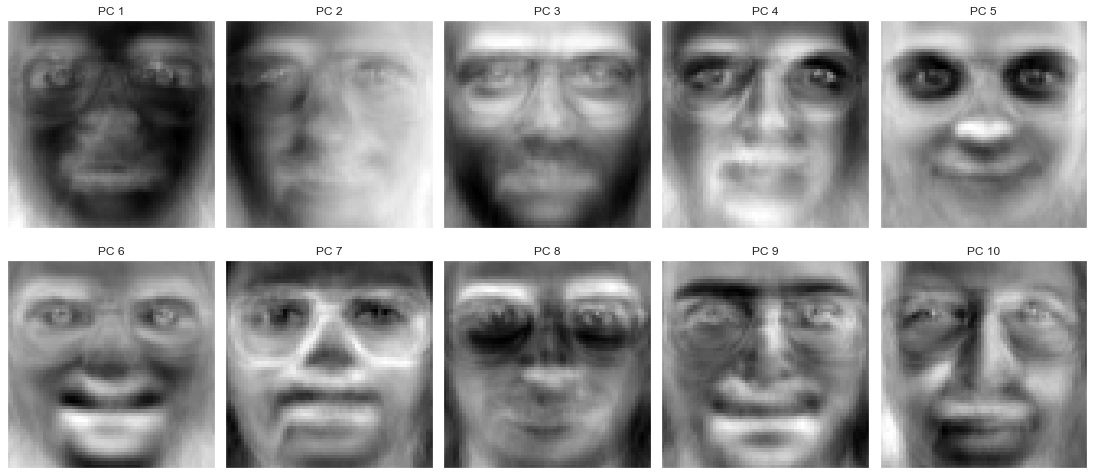

In [24]:
fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.3, hspace=0.05, wspace=0.05) 
# Graficamos los primeros 10 componentes
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[], title = 'PC '+str(i+1))
    ax.imshow(np.reshape(faces_pca.components_[i,:], (64,64)), cmap=plt.cm.gray, interpolation='nearest')

In [ ]:
#GRAFICO INTERACTIVO CON BOKEH

In [82]:
#pip install bokeh

In [91]:
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.palettes import brewer, Viridis256
import re

In [106]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

dir_tr = 'C:/Users/Evangelina Garza/Documents/CIMAT/MCE_2Semestre/Ciencia de Datos/PCA/faces_t'
sorted_files = sorted_alphanumeric(os.listdir(dir_tr))
name_imgs_tr = [os.path.join(dir_tr,f) for f in sorted_files]

dir_tr_test = 'C:/Users/Evangelina Garza/Documents/CIMAT/MCE_2Semestre/Ciencia de Datos/PCA/faces_p'
sorted_files_t = sorted_alphanumeric(os.listdir(dir_tr_test))
name_imgs_ts = [os.path.join(dir_tr_test,j) for j in sorted_files_t]

In [93]:
#pip install colorcet

In [94]:
#pip install holoviews

In [109]:
import colorcet as cc
import matplotlib.colors as colors
from colorcet.plotting import swatch, swatches, candy_buttons

# cc.glasbey_bw es un mapa de colores para datos categóricos... 
# ver https://colorcet.holoviz.org/user_guide/Categorical.html
lab = np.concatenate([np.repeat(i,9) for i in range(1,40)]) #10 fotos por cada uno de los 40 sujeto
lab2 = np.concatenate([np.repeat(i,1) for i in range(40)]) #1 fotos por cada uno de los 40 sujetos

color_map = [colors.rgb2hex(cc.glasbey_bw[i]) for i in (lab+1)]
color_map2 = [colors.rgb2hex(cc.glasbey_bw[i]) for i in (lab2+1)]

# diccionario con los datos para la grafica de Bokeh
pc_source = dict(x=faces_proj[:,1], y=faces_proj[:,2], 
                 label=lab,
                 color=color_map,
                 desc=['sujeto: '+str(i) for i in range(1,faces_proj.shape[0]+1)],
                 imgs=name_imgs_tr)

pc_source_t = dict(x=faces_proj_test[:,1], y=faces_proj_test[:,2], 
                 label=lab2,
                 color=color_map2,
                 desc=['sujeto: '+str(i) for i in range(1,faces_proj_test.shape[0]+1)],
                 imgs=name_imgs_ts)


In [110]:
output_file("Eigenfaces_pc1pc2.html")

source = ColumnDataSource(data = pc_source)
source_t = ColumnDataSource(data = pc_source_t)

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="100" alt="@imgs" width="100"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=2000, plot_height=800, tools=[hover], title="Eigenfaces",
          x_axis_label="PC 1",y_axis_label="PC 2")

p.circle('x', 'y', size=5,  color='color', source=source)
p.asterisk('x', 'y', size=20, source=source_t)

show(p)

In [25]:
#Estandarizacion del conjunto de prueba
scaler = StandardScaler(with_mean=True,with_std=True)
faces_scale_test = scaler.fit_transform(faces_test)

In [26]:
faces_scale_test.shape

(40, 4096)

In [27]:
componentes=faces_pca.components_

In [28]:
componentes.shape

(10, 4096)

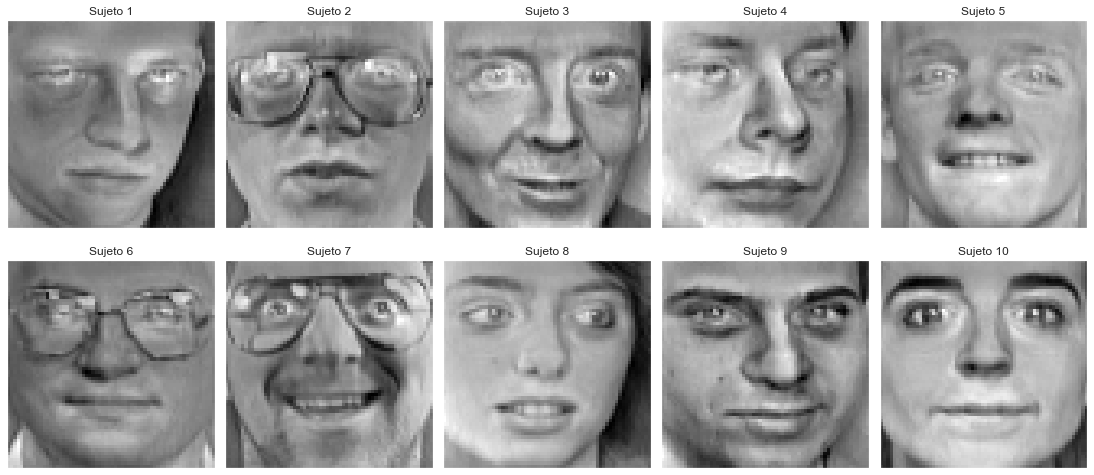

In [38]:
#Visualizacion de las primeras 10 caras del conjunto de prueba estandarizadas

fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.3, hspace=0.05, wspace=0.05) 
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[], title = 'Sujeto '+str(i+1))
    ax.imshow(np.reshape(faces_scale_test[i,:], (64,64)), cmap=plt.cm.gray, interpolation='nearest')

In [31]:
for i in range(10):
    np.reshape(faces_scale_test[i,:],(64,64))

In [32]:
#Proyeccion en los n componentes principales (10)
faces_proj_test = faces_pca.fit_transform(faces_scale_test)

In [35]:
#Conversion de regreso a la matriz original para su visualizacion
faces_proj_photo= faces_pca.inverse_transform(faces_proj_test)

In [36]:
faces_proj_photo.shape

(40, 4096)

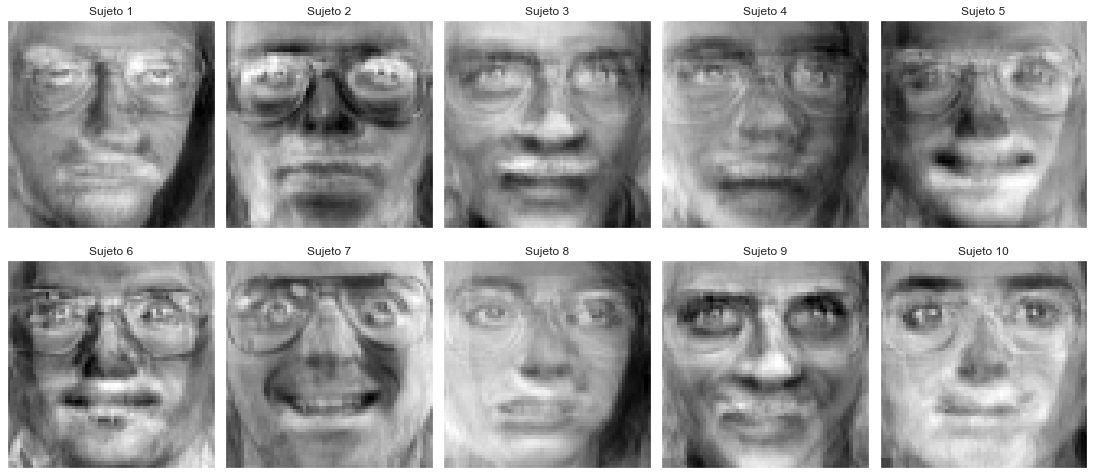

In [39]:
#Visualizacion de las primeras 10 caras del conjunto de prueba 
#despues de haber sido proyectadas en n=10 componentes principales

fig = plt.figure(figsize=(15,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.3, hspace=0.05, wspace=0.05) 
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[], title = 'Sujeto '+str(i+1))
    ax.imshow(np.reshape(faces_proj_photo[i,:], (64,64)), cmap=plt.cm.gray, interpolation='nearest')

In [40]:
#Funcion para encontrar el vecino mas cercano en un conjunto de puntos
from scipy import spatial
import numpy as np

def nearest_neighbour(points_a, points_b):
    tree = spatial.cKDTree(points_b)
    return tree.query(points_a)[1]

In [41]:
#Indices del vecino mas cercano para cada uno de los sujetos
nn=[]
for i in range(40):
    nn.append(nearest_neighbour(faces_proj_test[i,:],faces_proj))

nn[0]

204

In [42]:
faces_proj_test.shape

(40, 10)

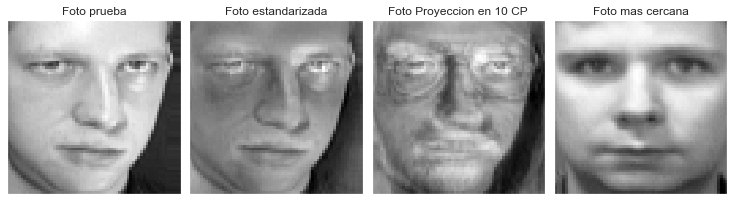

In [43]:
#Vecino mas cercano para sujeto 1
fig = plt.figure(figsize=(10,20),) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
plt.subplot(141,xticks=[],yticks=[],title='Foto prueba')
plt.imshow(np.reshape(faces_test[0,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(142,xticks=[],yticks=[],title='Foto estandarizada')
plt.imshow(np.reshape(faces_scale_test[0,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(143,xticks=[],yticks=[],title='Foto Proyeccion en 10 CP')
plt.imshow(np.reshape(faces_proj_photo[0,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(144,xticks=[],yticks=[],title='Foto mas cercana')
plt.imshow(np.reshape(faces_train[nn[0],:],(64,64)), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

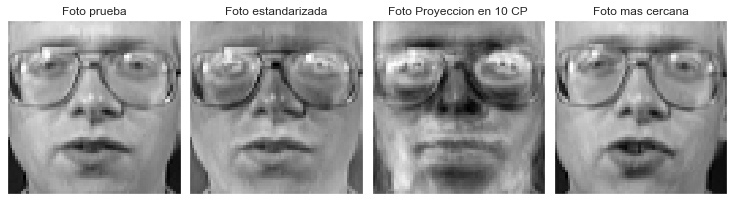

In [44]:
#Vecino mas cercano para sujeto 2
fig = plt.figure(figsize=(10,20),) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
plt.subplot(141,xticks=[],yticks=[],title='Foto prueba')
plt.imshow(np.reshape(faces_test[1,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(142,xticks=[],yticks=[],title='Foto estandarizada')
plt.imshow(np.reshape(faces_scale_test[1,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(143,xticks=[],yticks=[],title='Foto Proyeccion en 10 CP')
plt.imshow(np.reshape(faces_proj_photo[1,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(144,xticks=[],yticks=[],title='Foto mas cercana')
plt.imshow(np.reshape(faces_train[nn[1],:],(64,64)), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

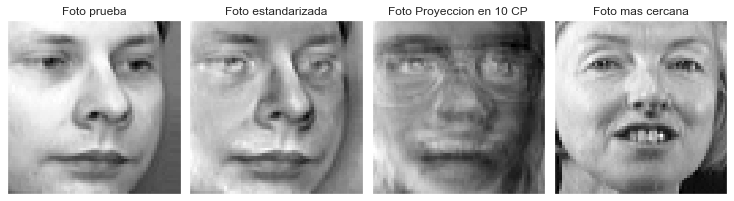

In [45]:
#Vecino mas cercano para sujeto 3
fig = plt.figure(figsize=(10,20),) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
plt.subplot(141,xticks=[],yticks=[],title='Foto prueba')
plt.imshow(np.reshape(faces_test[3,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(142,xticks=[],yticks=[],title='Foto estandarizada')
plt.imshow(np.reshape(faces_scale_test[3,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(143,xticks=[],yticks=[],title='Foto Proyeccion en 10 CP')
plt.imshow(np.reshape(faces_proj_photo[3,:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(144,xticks=[],yticks=[],title='Foto mas cercana')
plt.imshow(np.reshape(faces_train[nn[3],:],(64,64)), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [46]:
#Carga de imagen fuera de la base de datos original (personal)
import skimage.io as io
from skimage.color import rgb2gray 
yo = io.imread('foto1.png')
yo = rgb2gray(yo)

In [47]:
yo = np.asarray(yo)

In [48]:
yo.shape

(64, 64)

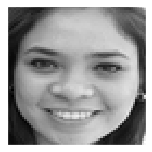

In [49]:
#Visualizacion imagen original
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
 
ax = fig.add_subplot(5, 5, 1, xticks=[], yticks=[]) 
ax.imshow(yo, cmap=plt.cm.gray, interpolation='nearest') 
plt.show()

In [50]:
yo=np.reshape(yo,(1,4096))

In [51]:
media=np.mean(yo)
mistd=np.std(yo)

In [52]:
yo_scale=(yo-media)/mistd

In [53]:
yo_scale.shape

(1, 4096)

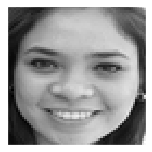

In [54]:
#Visualizacion imagen estandarizada
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
 
ax = fig.add_subplot(5, 5, 1, xticks=[], yticks=[]) 
ax.imshow(np.reshape(yo_scale,(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.show()

In [55]:
pca_mtx=faces_pca.components_.T

In [56]:
yo_proj=yo_scale.dot(pca_mtx)

In [57]:
yo_proj.shape

(1, 10)

In [58]:
yo_proj_photo=faces_pca.inverse_transform(yo_proj)

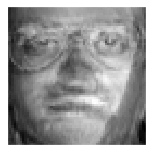

In [60]:
#Proyeccion en n=10 cp
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
 
ax = fig.add_subplot(5, 5, 1, xticks=[], yticks=[]) 
ax.imshow(np.reshape(yo_proj_photo,(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.show()

In [61]:
nny=nearest_neighbour(yo_proj,faces_proj)

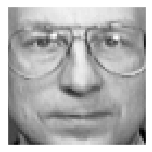

In [62]:
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
 
ax = fig.add_subplot(5, 5, 1, xticks=[], yticks=[]) 
ax.imshow(np.reshape(faces_train[nny[0],:],(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.show()

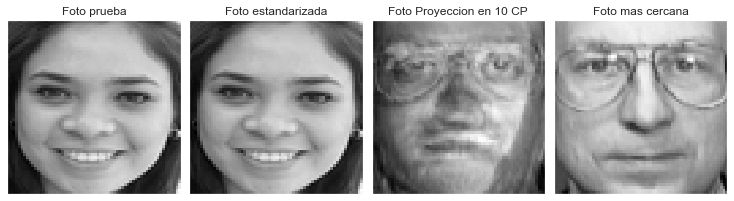

In [63]:
fig = plt.figure(figsize=(10,20),) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
plt.subplot(141,xticks=[],yticks=[],title='Foto prueba')
plt.imshow(np.reshape(yo,(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(142,xticks=[],yticks=[],title='Foto estandarizada')
plt.imshow(np.reshape(yo_scale,(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(143,xticks=[],yticks=[],title='Foto Proyeccion en 10 CP')
plt.imshow(np.reshape(yo_proj_photo,(64,64)), cmap=plt.cm.gray, interpolation='nearest') 
plt.subplot(144,xticks=[],yticks=[],title='Foto mas cercana')
plt.imshow(np.reshape(faces_train[nny[0],:],(64,64)), cmap=plt.cm.gray, interpolation='nearest')
plt.show()